In [3]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
from core.data_processor import DataLoader
from core.model import Model

Using TensorFlow backend.


In [4]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
#     plt.legend()
    plt.show()
    
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
	# Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
#         plt.legend()
    plt.show()

[Model] Model Compiled
Time taken: 0:00:00.354407
[Model] Training Started
[Model] 2 epochs, 32 batch size, 124 batches per epoch
Epoch 1/2
124/124 [==============================] - 13s 104ms/step - loss: 0.0018
Epoch 2/2
124/124 [==============================] - 12s 98ms/step - loss: 7.4725e-04
[Model] Training Completed. Model saved as saved_models/02102019-114311-e2.h5
Time taken: 0:00:26.848508
[Model] Predicting Sequences Multiple...


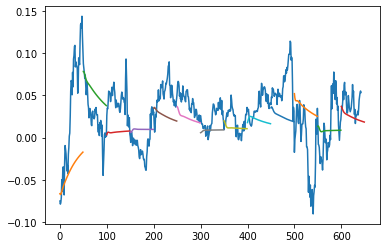

In [5]:
configs = json.load(open('config.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])

data = DataLoader(
    os.path.join('data', configs['data']['filename']),
    configs['data']['train_test_split'],
    configs['data']['columns']
)

model = Model()
model.build_model(configs)
x, y = data.get_train_data(
    seq_len=configs['data']['sequence_length'],
    normalise=configs['data']['normalise']
)

'''
# in-memory training
model.train(
    x,
    y,
    epochs = configs['training']['epochs'],
    batch_size = configs['training']['batch_size'],
    save_dir = configs['model']['save_dir']
)
'''
# out-of memory generative training
steps_per_epoch = math.ceil((data.len_train - configs['data']['sequence_length']) / configs['training']['batch_size'])
model.train_generator(
    data_gen=data.generate_train_batch(
        seq_len=configs['data']['sequence_length'],
        batch_size=configs['training']['batch_size'],
        normalise=configs['data']['normalise']
    ),
    epochs=configs['training']['epochs'],
    batch_size=configs['training']['batch_size'],
    steps_per_epoch=steps_per_epoch,
    save_dir=configs['model']['save_dir']
)

x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=configs['data']['normalise']
)

predictions = model.predict_sequences_multiple(x_test, configs['data']['sequence_length'], configs['data']['sequence_length'])
# predictions = model.predict_sequence_full(x_test, configs['data']['sequence_length'])
# predictions = model.predict_point_by_point(x_test)

plot_results_multiple(predictions, y_test, configs['data']['sequence_length'])
# plot_results(predictions, y_test)

In [6]:
print(predictions[0:1])

[[-0.066444084, -0.06749057, -0.06705632, -0.06567518, -0.063847885, -0.061910048, -0.060037542, -0.05829446, -0.05668216, -0.05517523, -0.053742968, -0.052359886, -0.051008526, -0.049679544, -0.04836905, -0.047077022, -0.045805447, -0.044556625, -0.043332893, -0.042136148, -0.040967595, -0.039827835, -0.038717072, -0.037635054, -0.036581278, -0.03555513, -0.034555733, -0.03358224, -0.032633863, -0.03170963, -0.030808853, -0.029930696, -0.029074358, -0.028239172, -0.027424384, -0.026629472, -0.025853708, -0.02509656, -0.024357416, -0.023635622, -0.022930846, -0.022242649, -0.021570453, -0.020913847, -0.020272491, -0.01964595, -0.019033825, -0.018435765, -0.017851358, -0.017280204]]
